<a href="https://colab.research.google.com/github/2023garvitshrivastava-sketch/ML_lab/blob/main/Expectation_maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

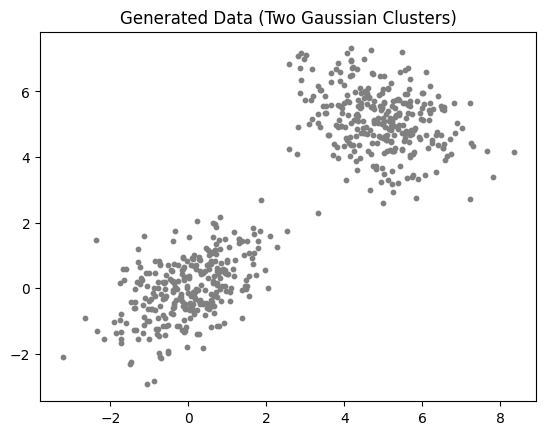

Iteration 1: log-likelihood = -2249.37
Iteration 2: log-likelihood = -2194.09
Iteration 3: log-likelihood = -2150.57
Iteration 4: log-likelihood = -2093.21
Iteration 5: log-likelihood = -2038.36
Iteration 6: log-likelihood = -2030.06
Iteration 7: log-likelihood = -2030.03
Iteration 8: log-likelihood = -2030.03
Iteration 9: log-likelihood = -2030.03
Iteration 10: log-likelihood = -2030.03
Iteration 11: log-likelihood = -2030.03
Iteration 12: log-likelihood = -2030.03
Iteration 13: log-likelihood = -2030.03
Iteration 14: log-likelihood = -2030.03
Iteration 15: log-likelihood = -2030.03
Iteration 16: log-likelihood = -2030.03
Iteration 17: log-likelihood = -2030.03
Iteration 18: log-likelihood = -2030.03
Iteration 19: log-likelihood = -2030.03
Iteration 20: log-likelihood = -2030.03


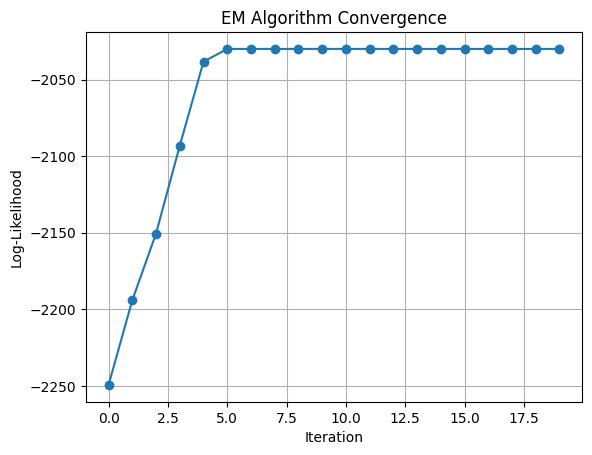

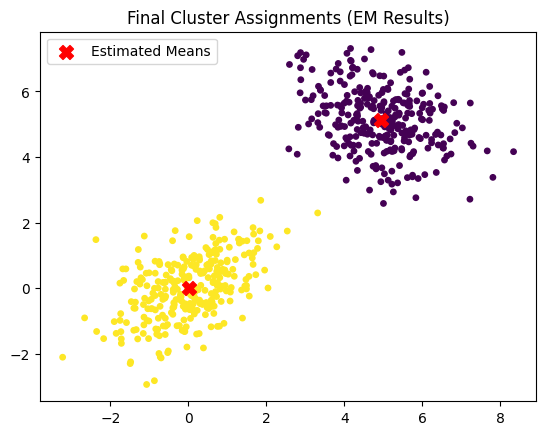

Estimated Means:
 [[4.94967454e+00 5.12910359e+00]
 [1.65518479e-02 6.60768594e-04]]

Mixing Coefficients: [0.50013682 0.49986318]


In [1]:
# =========================================================
# 🎯 Expectation–Maximization (EM) for Gaussian Mixture Model
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# --- 1. Generate synthetic 2D data ---
np.random.seed(42)
n = 300

# Two Gaussian clusters
mu_true = [np.array([0, 0]), np.array([5, 5])]
cov_true = [np.array([[1, 0.5], [0.5, 1]]),
            np.array([[1, -0.4], [-0.4, 1]])]

X1 = np.random.multivariate_normal(mu_true[0], cov_true[0], n)
X2 = np.random.multivariate_normal(mu_true[1], cov_true[1], n)
X = np.vstack((X1, X2))

plt.scatter(X[:,0], X[:,1], s=10, c='gray')
plt.title("Generated Data (Two Gaussian Clusters)")
plt.show()

# --- 2. Initialize EM parameters ---
k = 2  # number of clusters
n_samples, n_features = X.shape

# Random initial guesses
np.random.seed(1)
pi = np.ones(k) / k                          # mixing coefficients
mu = X[np.random.choice(n_samples, k, replace=False)]  # random means
cov = [np.eye(n_features) for _ in range(k)]  # identity covariance

# --- 3. EM Algorithm ---
log_likelihoods = []

for iteration in range(20):  # number of iterations
    # E-step: Compute responsibilities
    gamma = np.zeros((n_samples, k))
    for j in range(k):
        gamma[:, j] = pi[j] * multivariate_normal.pdf(X, mean=mu[j], cov=cov[j])
    gamma = gamma / gamma.sum(axis=1, keepdims=True)

    # M-step: Update parameters
    N_k = gamma.sum(axis=0)
    for j in range(k):
        mu[j] = (1 / N_k[j]) * np.sum(gamma[:, j].reshape(-1, 1) * X, axis=0)
        diff = X - mu[j]
        cov[j] = (1 / N_k[j]) * (gamma[:, j].reshape(-1, 1) * diff).T.dot(diff)
        pi[j] = N_k[j] / n_samples

    # Compute log-likelihood for monitoring
    log_likelihood = np.sum(np.log(
        np.sum([pi[j] * multivariate_normal.pdf(X, mu[j], cov[j]) for j in range(k)], axis=0)
    ))
    log_likelihoods.append(log_likelihood)

    print(f"Iteration {iteration+1}: log-likelihood = {log_likelihood:.2f}")

# --- 4. Plot log-likelihood over iterations ---
plt.plot(log_likelihoods, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("EM Algorithm Convergence")
plt.grid(True)
plt.show()-

# --- 5. Visualize final cluster assignments ---
cluster_assignments = np.argmax(gamma, axis=1)
plt.scatter(X[:,0], X[:,1], c=cluster_assignments, cmap='viridis', s=15)
plt.scatter(mu[:,0], mu[:,1], c='red', s=100, marker='X', label='Estimated Means')
plt.title("Final Cluster Assignments (EM Results)")
plt.legend()
plt.show()

print("Estimated Means:\n", mu)
print("\nMixing Coefficients:", pi)
